In [ ]:
classify the Size_Categorie using SVM

month	month of the year: 'jan' to 'dec'
day	day of the week: 'mon' to 'sun'
FFMC	FFMC index from the FWI system: 18.7 to 96.20
DMC	DMC index from the FWI system: 1.1 to 291.3
DC	DC index from the FWI system: 7.9 to 860.6
ISI	ISI index from the FWI system: 0.0 to 56.10
temp	temperature in Celsius degrees: 2.2 to 33.30
RH	relative humidity in %: 15.0 to 100
wind	wind speed in km/h: 0.40 to 9.40
rain	outside rain in mm/m2 : 0.0 to 6.4
Size_Categorie 	the burned area of the forest ( Small , Large)

In [ ]:
#importing libraries

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

In [ ]:
# reading file

In [7]:
df =pd.read_csv('forestfires.csv')
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [ ]:
# eda

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [9]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [11]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['size_category']=label_encoder.fit_transform(df['size_category'])
df['day']=label_encoder.fit_transform(df['day'])

In [12]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,oct,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,oct,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,mar,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,mar,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,aug,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,aug,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,aug,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
df = df.drop(['month'],axis=1)
df

,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,...,0,0,0,0,1,0,0,0,0,1
1,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,...,0,0,0,0,0,0,0,1,0,1
2,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,...,0,0,0,0,0,0,0,1,0,1
3,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,...,0,0,0,0,1,0,0,0,0,1
4,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,...,0,0,0,0,0,0,0,0,0,0
513,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,...,0,0,0,0,0,0,0,0,0,0
514,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,...,0,0,0,0,0,0,0,0,0,0
515,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,...,0,0,0,0,0,0,0,0,0,1


In [14]:
x= df.iloc[:,0:29]



In [15]:
x

,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,...,0,0,0,0,0,1,0,0,0,0
1,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,...,0,0,0,0,0,0,0,0,1,0
2,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,...,0,0,0,0,0,0,0,0,1,0
3,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,...,0,0,0,0,0,1,0,0,0,0
4,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,...,0,0,0,0,0,0,0,0,0,0
513,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,...,0,0,0,0,0,0,0,0,0,0
514,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,...,0,0,0,0,0,0,0,0,0,0
515,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,...,0,0,0,0,0,0,0,0,0,0


In [16]:
y = df['size_category']

In [17]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state=42)

In [19]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [20]:
gsv.best_params_ , gsv.best_score_ # BEST PARAMEERS

({'C': 15, 'gamma': 50, 'kernel': 'rbf'}, 0.7365047233468286)

In [21]:
clf = SVC(C= 15, gamma = 50) # soft margin change cost values
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 73.07692307692307


array([[ 0, 35],
       [ 0, 95]], dtype=int64)

In [22]:
clf = SVC(kernel= "linear") 
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)    

Accuracy = 98.46153846153847


array([[33,  2],
       [ 0, 95]], dtype=int64)

In [23]:
clf = SVC(kernel= "poly") 
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)    

Accuracy = 76.92307692307693


array([[ 5, 30],
       [ 0, 95]], dtype=int64)

In [24]:
clf = SVC(kernel= "sigmoid") 
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)    

Accuracy = 70.76923076923077


array([[ 7, 28],
       [10, 85]], dtype=int64)

In [25]:
clf = SVC(kernel= "rbf") 
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)    

Accuracy = 74.61538461538461


array([[ 2, 33],
       [ 0, 95]], dtype=int64)

In [26]:
# Use statistical test , apart from heatmap, to get the collinearity among features.


In [27]:
#Collinearity using VIF- Variance Inflation Factor


In [28]:
#If VIF is between 5-10, multi-collinearity is likely present.



In [29]:
#Step 1: Run multiple- regression


In [31]:
X= df.iloc[:,:-1]
Y= pd.DataFrame(df.iloc[:,-1])

In [32]:
#Step 2: Calculate VIF factors


In [33]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
vif= pd.DataFrame()
vif['vif factor']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features']= X.columns

C:\Users\berri\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [35]:
#Step 3: Inspect VIF


In [36]:
vif.round(2)


,vif factor,features
0,inf,day
1,2.28,FFMC
2,3.88,DMC
3,26.50,DC
4,1.81,ISI
5,4.52,temp
6,2.77,RH
7,1.28,wind
8,1.09,rain
9,1.04,area


In [37]:
#Inferences: There's a very high collinearity amongst the columns and most of them can be dropped


In [38]:
#. Make use of PCA in reducing the dimensionality


In [39]:
from sklearn.decomposition import PCA
pca= PCA(n_components= 3)
X_reduced= pd.DataFrame(pca.fit_transform(X))
X_reduced.columns= ['f1', 'f2', 'f3']
X_reduced.head()

,f1,f2,f3
0,461.749092,-6.747080,-1.184445
1,-105.454954,-21.587079,-95.137494
2,-124.410505,-21.489048,-90.246694
3,477.040906,-6.567071,11.631485
4,449.495832,-5.931459,24.982835


In [40]:
scaled_X= X_reduced
from sklearn.preprocessing import MinMaxScaler
minmax= MinMaxScaler()
scaled_X= pd.DataFrame(minmax.fit_transform(scaled_X))
scaled_X

,0,1,2
0,0.899877,0.014665,0.437228
1,0.262978,0.001110,0.010620
2,0.241693,0.001199,0.032827
3,0.917047,0.014829,0.495420
4,0.886118,0.015410,0.556044
...,...,...,...
512,0.262422,0.008566,0.105029
513,0.261862,0.051444,0.098090
514,0.262539,0.012193,0.112897
515,0.300645,0.009926,0.549874


In [41]:
# Verify the effect of C parameter and gamma function. Plot the accuracy of train and test score


In [42]:
#Model Building


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X_reduced, Y, 
                                                   test_size= 0.3, random_state= 0)


In [44]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [45]:
#SVM with default parameters


In [47]:
svc= SVC()
svc.fit(X_train, Y_train.values.ravel())
pred= svc.predict(X_test)
print("Accuracy score:", accuracy_score(Y_test, pred))

Accuracy score: 0.782051282051282


In [48]:
#'C' Parameter Tuning


In [52]:
from sklearn.model_selection import cross_val_score
C_range= list(np.arange(0.1,2,0.1))
accuracy_score= []
for c in C_range:
    svc= SVC(kernel= 'linear', C=c)
    scores= cross_val_score(svc, X, Y.values.ravel(), scoring= 'accuracy')
    accuracy_score.append(scores.mean())
print(accuracy_score)


[0.9883495145631068, 0.9864077669902912, 0.9902912621359224, 0.9902912621359224, 0.9883495145631068, 0.9883495145631068, 0.9864077669902912, 0.9864077669902912, 0.9883495145631068, 0.9922330097087378, 0.9902912621359224, 0.9902912621359224, 0.9902912621359224, 0.9902912621359224, 0.9902912621359224, 0.9902912621359224, 0.9902912621359224, 0.9902912621359224, 0.9902912621359224]


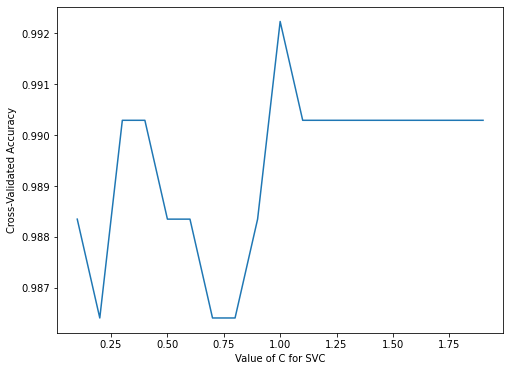

In [53]:
import matplotlib.pyplot as plt
figure= plt.figure(figsize= (8,6))
axes= figure.add_subplot(1,1,1)
axes.plot(C_range, accuracy_score)
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')
plt.show()
